In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame, Series
import datetime
import pytz
import matplotlib.pyplot as plt
import preprocessing as prep

In [15]:
def df_to_timeseries(df):
    gr = df.groupby(by='frame_idx')
    num_columns = df.frame_idx.unique().max() + 1
    u_id = df.id.unique()
    dft = DataFrame(0, index=u_id, columns=np.arange(num_columns))

    for i, group in gr:
        l = group['id']
        dft.loc[l,i] = 1
    
    return dft

In [3]:
startT = "2016-07-21T15:00:00Z"
startT_dt = datetime.datetime.strptime(startT, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=pytz.UTC)
startT_ts = startT_dt.timestamp()
endT_dt = startT_dt + datetime.timedelta(minutes=10)
endT_ts = endT_dt.timestamp()

In [135]:
t0= prep.getDF("/mnt/data2016/",startT_ts, endT_ts, 0)

In [139]:
t0.shape

(214560, 10)

In [136]:
t1= prep.getDF("/mnt/data2016/",startT_ts, endT_ts, 1)

In [140]:
t1.shape

(251050, 10)

In [137]:
t2= prep.getDF("/mnt/data2016/",startT_ts, endT_ts, 2)

In [141]:
t2.shape

(231814, 10)

In [138]:
t3= prep.getDF("/mnt/data2016/",startT_ts, endT_ts, 3)

In [142]:
t3.shape

(229797, 10)

In [143]:
df3test = prep.getDF("/mnt/data2016/",startT_ts, endT_ts, 1)

In [144]:
df3test.shape

(251050, 10)

In [145]:
df3id = prep.calcIds(df3test, 0.95, 2016)

In [146]:
df3id.shape

(140734, 11)

In [147]:
len(df3id.id.unique())

1194

In [122]:
dft = df_to_timeseries(df3id)

In [123]:
dft.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800
1338,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
144,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [162]:
def get_ketten(kette, val):
    kette = kette.apply(str)
    s = kette.str.cat(sep='')
    s = s.strip("0")
    ss = s.split(val)
    return [len(x) for x in ss if len(x) > 0]

In [163]:
get_ketten(Series([1,1,0,0,1,1,1,0,1,0,0,0,0,0,]), '1')

[2, 1]

In [180]:
ketten = list(dft.apply(get_ketten, axis=1, args=['0']).values)

In [181]:
flattened = [n for elem in ketten for n in elem]

In [182]:
%matplotlib inline

In [183]:
s = Series(flattened)

In [184]:
s.describe()

count    28463.000000
mean         4.621192
std          9.959929
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        570.000000
dtype: float64

In [185]:
s.mode()

0    1
dtype: int64

In [186]:
s.mean()

4.6211924252538381

In [187]:
s.median()

2.0

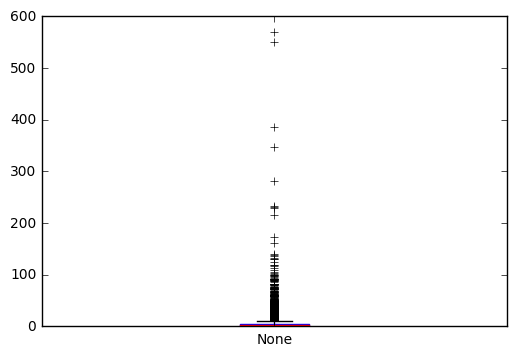

In [188]:
s.plot.box()

In [148]:
pairs = prep.get_close_bees_ckd(df3id, 212)

In [151]:
def bee_pairs_to_timeseries(close):
    max = close.frame_idx.unique().max() + 1
    close['pair'] = list(zip(close.id_x, close.id_y))
    u_pairs = close.pair.unique()
    dft = DataFrame(0, index=u_pairs, columns=np.arange(max))
    gr = close.groupby('frame_idx')

    for i, group in gr:
        l = group['pair']
        dft.loc[l,i] = 1

    return dft

In [152]:
dt = bee_pairs_to_timeseries(pairs)

In [153]:
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,1796,1797,1798,1799,1800,1801,1802,1803,1804,1805
"(297, 797)",1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(2714, 3724)",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(315, 374)",1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
"(579, 1115)",1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(2853, 3869)",1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [189]:
ketten2 = list(dt.apply(get_ketten, axis=1, args=['0']).values)

In [190]:
flattened2 = [n for elem in ketten2 for n in elem]

In [191]:
s = Series(flattened2)

In [192]:
s.describe()

count    34540.000000
mean         2.094296
std          2.473320
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        174.000000
dtype: float64

In [193]:
s.mode()

0    1
dtype: int64

In [194]:
s.median()

1.0

In [195]:
s.mean()

2.0942964678633467

In [196]:
def fill_gaps(ll, gap):
    length = -1
    for n,k in enumerate(ll):
        if k == 0:
            if length != -1:
                length += 1
        if k == 1:
            if length <= gap:
                # auffüllen
                for i in list(range(length+1)):
                    ll[n-i] = 1
            length = 0
    return ll

In [200]:
filled = dt.apply(fill_gaps, axis=1, args=[2])

In [204]:
filled.head()

,0,1,2,3,4,5,6,7,8,9,...,1796,1797,1798,1799,1800,1801,1802,1803,1804,1805
"(297, 797)",1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(2714, 3724)",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(315, 374)",1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
"(579, 1115)",1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(2853, 3869)",1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [205]:
ketten3 = list(filled.apply(get_ketten, axis=1, args=['0']).values)

In [207]:
flattened3 = [n for elem in ketten3 for n in elem]

In [208]:
s3 = Series(flattened3)

In [252]:
s3 = s3[s3 < 30]

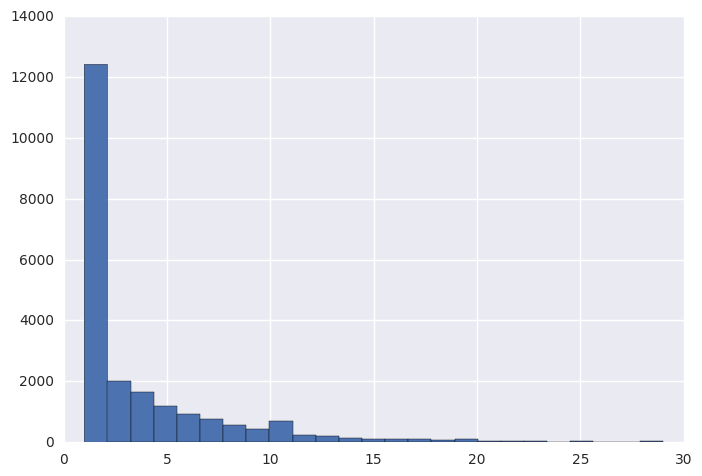

In [253]:
s3.hist(bins=25)

In [254]:
s3.describe()

count    21993.000000
mean         3.712363
std          4.148867
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         29.000000
dtype: float64

In [255]:
s3.mode()

0    1
dtype: int64

In [256]:
s3.median()

2.0

In [257]:
s3.mean()

3.7123630245987358

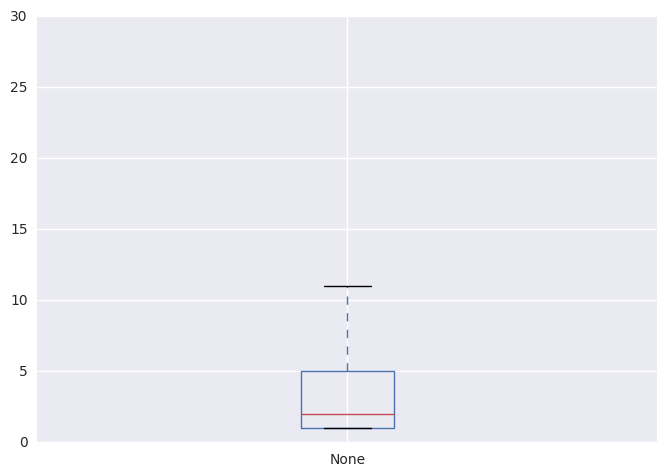

In [258]:
s3.plot.box()

In [259]:
for i in np.(

SyntaxError: invalid syntax (<ipython-input-259-df24a7e6ff39>, line 1)

In [260]:
stat = []
for i in np.arange(0,1.01,0.01):
    stat.append((i*100, s3.quantile(q=i)))

In [261]:
dfstat = DataFrame(stat, columns=['quantile', 'values'])

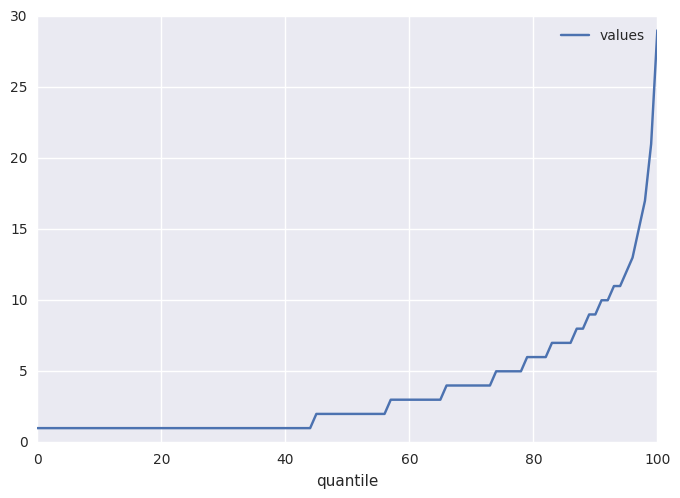

In [262]:
dfstat.plot(x='quantile', y='values')

In [240]:
stat

[(0.0, 1.0),
 (1.0, 1.0),
 (2.0, 1.0),
 (3.0, 1.0),
 (4.0, 1.0),
 (5.0, 1.0),
 (6.0, 1.0),
 (7.0000000000000009, 1.0),
 (8.0, 1.0),
 (9.0, 1.0),
 (10.0, 1.0),
 (11.0, 1.0),
 (12.0, 1.0),
 (13.0, 1.0),
 (14.000000000000002, 1.0),
 (15.0, 1.0),
 (16.0, 1.0),
 (17.0, 1.0),
 (18.0, 1.0),
 (19.0, 1.0),
 (20.0, 1.0),
 (21.0, 1.0),
 (22.0, 1.0),
 (23.0, 1.0),
 (24.0, 1.0),
 (25.0, 1.0),
 (26.0, 1.0),
 (27.0, 1.0),
 (28.000000000000004, 1.0),
 (28.999999999999996, 1.0),
 (30.0, 1.0),
 (31.0, 1.0),
 (32.0, 1.0),
 (33.0, 1.0),
 (34.0, 1.0),
 (35.0, 1.0),
 (36.0, 1.0),
 (37.0, 1.0),
 (38.0, 1.0),
 (39.0, 1.0),
 (40.0, 1.0),
 (41.0, 1.0),
 (42.0, 1.0),
 (43.0, 1.0),
 (44.0, 2.0),
 (45.0, 2.0),
 (46.0, 2.0),
 (47.0, 2.0),
 (48.0, 2.0),
 (49.0, 2.0),
 (50.0, 2.0),
 (51.0, 2.0),
 (52.0, 2.0),
 (53.0, 2.0),
 (54.0, 2.0),
 (55.000000000000007, 2.0),
 (56.000000000000007, 2.0),
 (57.000000000000007, 3.0),
 (57.999999999999993, 3.0),
 (59.0, 3.0),
 (60.0, 3.0),
 (61.0, 3.0),
 (62.0, 3.0),
 (63.0, 3.0),
 